In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_df=pd.read_csv('/kaggle/input/titanic/train.csv')
test_df=pd.read_csv('/kaggle/input/titanic/test.csv')
gender_df=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')



In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.columns,test_df.columns,gender_df.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Survived'], dtype='object'))

# Explore Data

In [5]:
train_df.head(),test_df.head(),gender_df.head()

(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450   8.0500

In [6]:
train_df.set_index(train_df.PassengerId,inplace=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.drop("PassengerId",axis=1,inplace=True)

In [8]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test_df=pd.read_csv('../input/titanic/test.csv',index_col="PassengerId")

In [10]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


**Feature Classification: Categorical vs Numerical**
- Categorical: nominal, ordinal,ratio, interval
- Numerical: discrete, continous, time series,...

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


- Categorical:Survived, Sex, Embarked, Pclass (ordinal), SibSp,Parch
- Numerical: Age(continous),Fare (discrete)
- Mixtype of data: Ticket, Cabin
- Contain error/typo: Name
- Blank or Null: Cabin>Age>Embarked
- Variou Data Types: String, Int, Float



In [14]:
train_df["Survived"]=train_df["Survived"].astype('category')
train_df["Survived"].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [15]:
converted_features=['Pclass','Parch','Sex','SibSp','Embarked']

In [16]:
def convert_cat(df,features):
    for feature in features:
        df[feature]=df[feature].astype('category')

convert_cat(train_df, converted_features)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [17]:
convert_cat(test_df, converted_features)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null    category
 3   Age       332 non-null    float64 
 4   SibSp     418 non-null    category
 5   Parch     418 non-null    category
 6   Ticket    418 non-null    object  
 7   Fare      417 non-null    float64 
 8   Cabin     91 non-null     object  
 9   Embarked  418 non-null    category
dtypes: category(5), float64(2), object(3)
memory usage: 22.7+ KB


**Distribution of Numerical Data Columns**

In [18]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [19]:
test_df.describe()

,Age,Fare
count,332.000000,417.000000
mean,30.272590,35.627188
std,14.181209,55.907576
min,0.170000,0.000000
25%,21.000000,7.895800
50%,27.000000,14.454200
75%,39.000000,31.500000
max,76.000000,512.329200


**Distribution of Categorical Data Columns**


In [20]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


## **EDA (Exploratory Data Analysis)**

# target variable : Survived

In [21]:
train_df["Survived"].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [22]:
train_df["Survived"].value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


In [23]:
## Sex
train_df["Sex"].value_counts(normalize=True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


In [24]:
## Seaborn
import seaborn as sns

<Axes: xlabel='Sex', ylabel='count'>

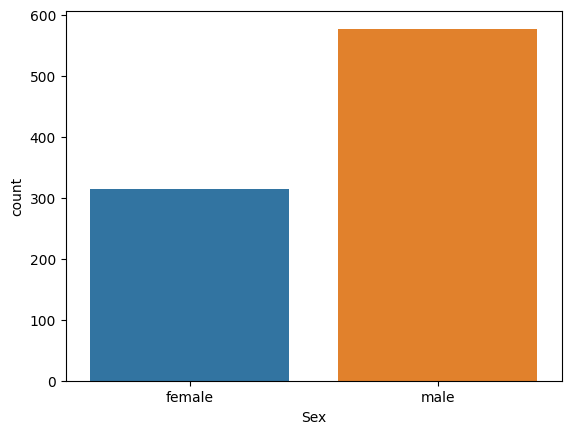

In [25]:
sns.countplot(data=train_df,x="Sex")

<Axes: xlabel='Sex', ylabel='count'>

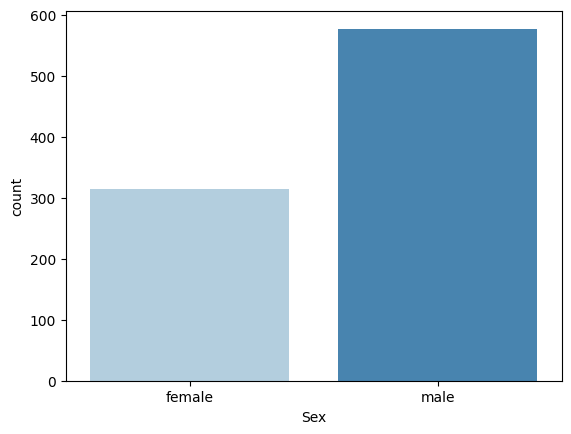

In [26]:
sns.countplot(data=train_df,x="Sex",palette="Blues")

<Axes: xlabel='Sex', ylabel='count'>

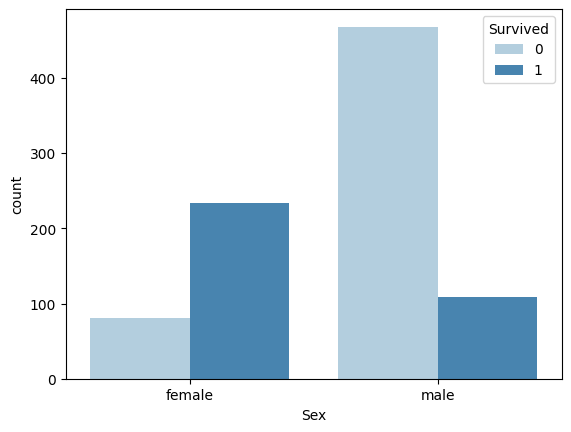

In [27]:
sns.countplot(data=train_df,x="Sex",hue="Survived",palette="Blues")

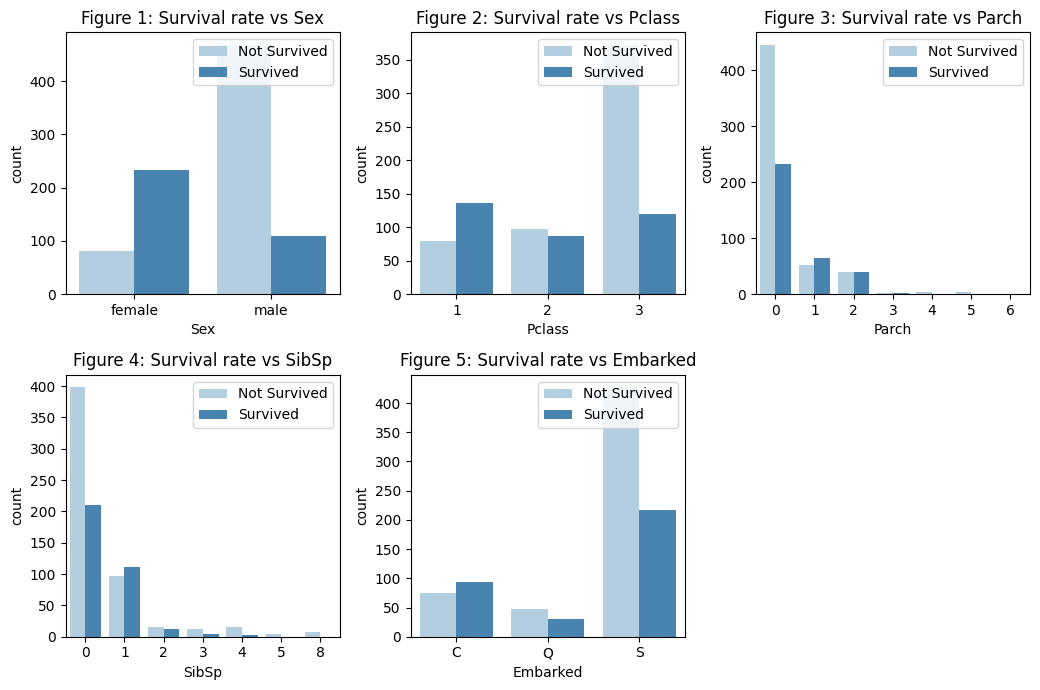

In [28]:
import matplotlib.pyplot as plt
# Plot 5 ax_ subplot to visualize the correlation between target (predict feature) and category features
cols=["Sex",'Pclass','Parch','SibSp','Embarked']
n_rows=2
n_cols=3
fig,ax=plt.subplots(n_rows,n_cols,figsize=(n_cols*3.5,n_rows*3.5))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols+c # index to loop through list cols
        if i <len(cols):
            ax_i=ax[r,c]
            sns.countplot(data=train_df,x=cols[i],hue="Survived",palette='Blues',ax=ax_i)
            ax_i.set_title(f'Figure {i+1}: Survival rate vs {cols[i]}')
            ax_i.legend(title='',loc='upper right',labels=["Not Survived","Survived"])
ax.flat[-1].set_visible(False) # Remove the last figure - subplot nodata
plt.tight_layout()
plt.show()


## EDA for Numerical Features


<Axes: xlabel='Age', ylabel='Count'>

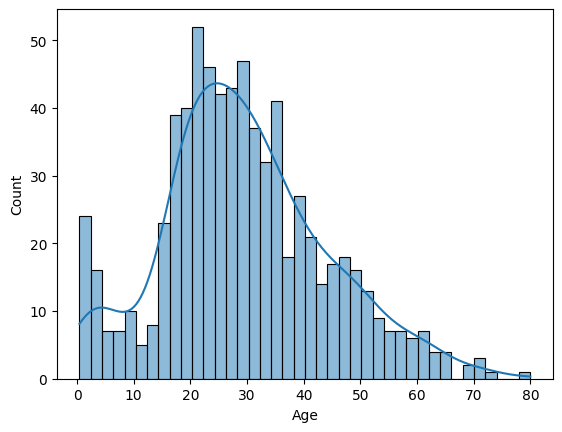

In [29]:
#Age
sns.histplot(data=train_df,x="Age",bins=40,kde=True)

<Axes: xlabel='Age', ylabel='Count'>

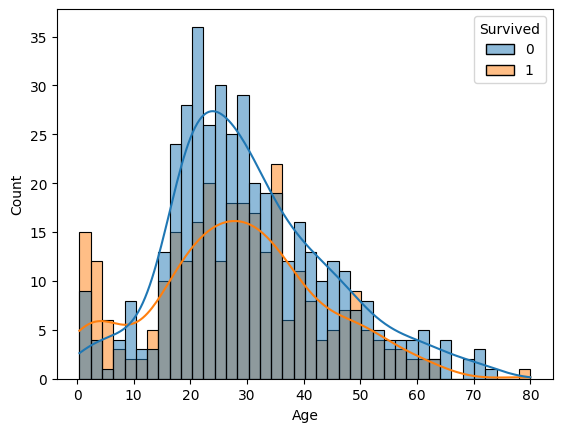

In [30]:
sns.histplot(data=train_df,x="Age",hue="Survived",bins=40,kde=True)

In [31]:
# Fare
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

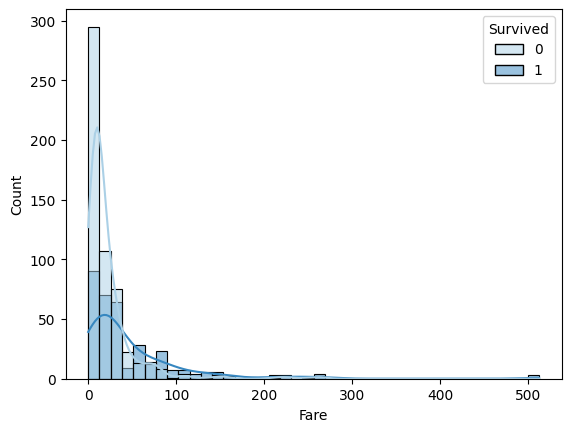

In [32]:
sns.histplot(data=train_df,x="Fare",hue="Survived",bins=40,kde=True,palette="Blues")

In [33]:
# qcut quartile: 0-25,25-50,50-75,75-100%
pd.qcut(train_df['Fare'],4)

PassengerId
1       (-0.001, 7.91]
2      (31.0, 512.329]
3       (7.91, 14.454]
4      (31.0, 512.329]
5       (7.91, 14.454]
            ...       
887     (7.91, 14.454]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (14.454, 31.0]
891     (-0.001, 7.91]
Name: Fare, Length: 891, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [34]:
train_df['Fare']

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

In [35]:
# qcut quartile: 0-25,25-50,50-75,75-100%
fare_categories=['Economic','Standard','Expensive','Luxury']
quartile_data=pd.qcut(train_df['Fare'],4,labels=fare_categories)
quartile_data

PassengerId
1       Economic
2         Luxury
3       Standard
4         Luxury
5       Standard
         ...    
887     Standard
888    Expensive
889    Expensive
890    Expensive
891     Economic
Name: Fare, Length: 891, dtype: category
Categories (4, object): ['Economic' < 'Standard' < 'Expensive' < 'Luxury']

<Axes: xlabel='Fare', ylabel='count'>

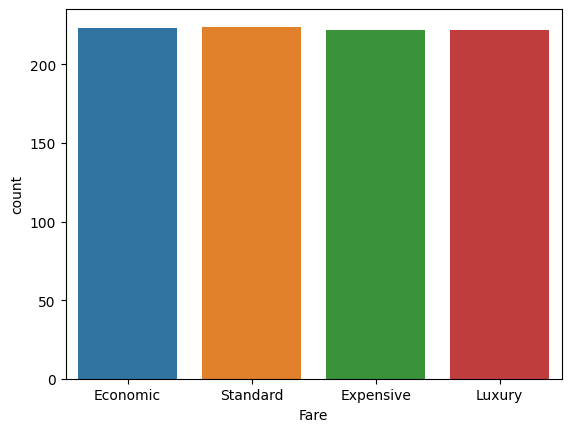

In [36]:
sns.countplot(x=quartile_data)

<Axes: xlabel='Fare', ylabel='count'>

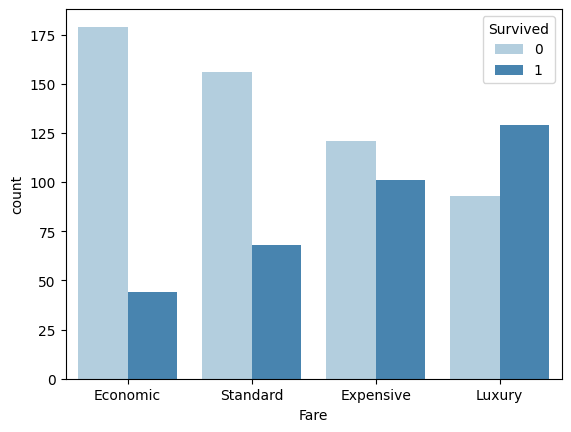

In [37]:
sns.countplot(x=quartile_data,hue=train_df["Survived"],palette="Blues")

### Feature Engineering & Data Wrangling

In [38]:
# Name
train_df["Name"].head(10)

PassengerId
1                               Braund, Mr. Owen Harris
2     Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                Heikkinen, Miss. Laina
4          Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                              Allen, Mr. William Henry
6                                      Moran, Mr. James
7                               McCarthy, Mr. Timothy J
8                        Palsson, Master. Gosta Leonard
9     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [39]:
train_df["Name"].tail(10)

PassengerId
882                          Markun, Mr. Johann
883                Dahlberg, Miss. Gerda Ulrika
884               Banfield, Mr. Frederick James
885                      Sutehall, Mr. Henry Jr
886        Rice, Mrs. William (Margaret Norton)
887                       Montvila, Rev. Juozas
888                Graham, Miss. Margaret Edith
889    Johnston, Miss. Catherine Helen "Carrie"
890                       Behr, Mr. Karl Howell
891                         Dooley, Mr. Patrick
Name: Name, dtype: object

In [40]:
import re 
def extract_title(name):
    p=re.compile(r",([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()
train_df["Title"]=train_df["Name"].apply(lambda name: extract_title(name) )

In [41]:
train_df["Title"].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [42]:
train_df[train_df["Name"].str.contains("Mrs. Martin")]['Name']

PassengerId
514    Rothschild, Mrs. Martin (Elizabeth L. Barrett)
Name: Name, dtype: object

In [43]:
test_df["Title"]=test_df["Name"].apply(lambda name: extract_title(name) )

In [44]:
test_df["Title"].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

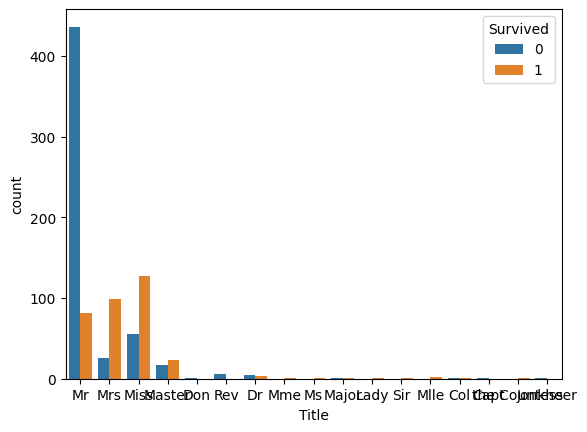

In [45]:
sns.countplot(data=train_df,x="Title",hue="Survived")

In [46]:
train_df["Title"].apply(lambda title: title if title in ["Mr","Mrs","Miss","Master"] else "Others" )

PassengerId
1          Mr
2         Mrs
3        Miss
4         Mrs
5          Mr
        ...  
887    Others
888      Miss
889      Miss
890        Mr
891        Mr
Name: Title, Length: 891, dtype: object

In [47]:
def group_title(title):
    if title in ["Mr","Mrs","Miss","Master"]:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Others"

In [48]:
train_df["Title"]=train_df["Title"].apply(lambda title: group_title(title))

In [49]:
test_df["Title"]=test_df["Title"].apply(lambda title: group_title(title))

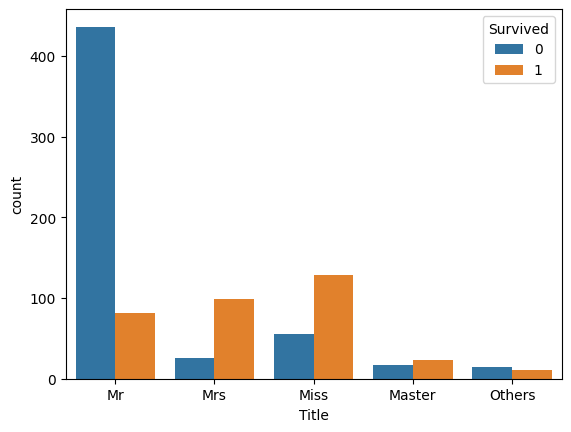

In [50]:
sns.countplot(data=train_df,x="Title",hue="Survived");

## Family size
# SibSp, Parch

In [51]:
train_df["Family_Size"]=train_df["SibSp"].astype('int')+train_df["Parch"].astype('int')+1

In [52]:
test_df["Family_Size"]=test_df["SibSp"].astype('int')+test_df["Parch"].astype('int')+1

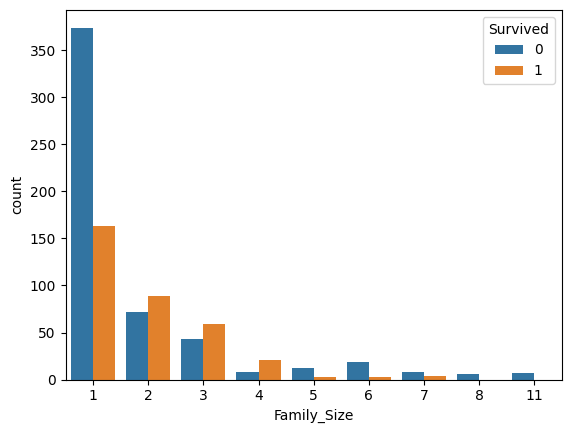

In [53]:
sns.countplot(data=train_df,x="Family_Size",hue="Survived");

In [54]:
train_df["Family_Cat"]=pd.cut(train_df["Family_Size"],bins=[0,1,4,6,20],labels=["Solo","Small","Medium","Large"])

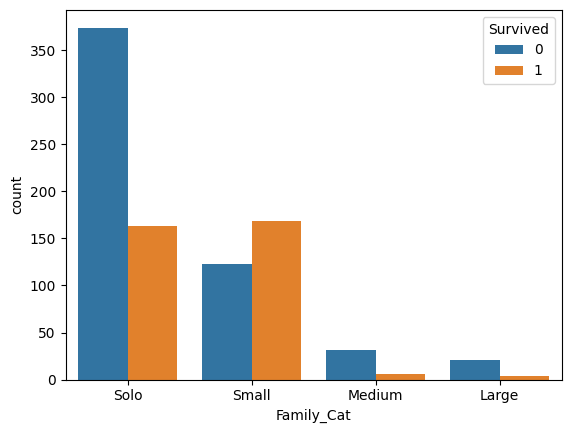

In [55]:
sns.countplot(data=train_df,x="Family_Cat",hue="Survived");

## Data Wrangling

In [56]:
test_df["Family_Cat"]=pd.cut(test_df["Family_Size"],bins=[0,1,4,6,20],labels=["Solo","Small","Medium","Large"])

In [57]:
num_features=["Age","Fare"]
cat_features=["Sex","Pclass","Embarked","Title","Family_Cat"]
feature_cols=num_features+cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [58]:
def display_missing(df,feature_cols):
    n_rows=df.shape[0]
    for col in feature_cols:
        missing_count=df[col].isnull().sum()
        if missing_count>0:
            print(f"Column {col} has {missing_count*100/n_rows: .2f}% missing values")
display_missing(train_df,feature_cols)
            
        

Column Age has  19.87% missing values
Column Embarked has  0.22% missing values


In [59]:
display_missing(test_df,feature_cols)


Column Age has  20.57% missing values
Column Fare has  0.24% missing values


# Fill missing values
## Age : fill missing values with median of whole dataset

In [60]:
train_df["Pclass"].dtype

CategoricalDtype(categories=[1, 2, 3], ordered=False)

In [61]:
age_by_sex_pclass=train_df[['Pclass', 'Sex','Age']].groupby(['Sex','Pclass']).median()['Age']
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [62]:
# fill missing values by median of group sex & Pclass
train_df.Age.fillna(train_df[['Pclass', 'Sex','Age']].groupby(['Sex','Pclass']).transform('median').Age, inplace=True)

In [63]:
train_df.Age

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889    21.5
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [64]:
test_df.Age.fillna(test_df[['Pclass', 'Sex','Age']].groupby(['Sex','Pclass']).transform('median').Age, inplace=True)

In [65]:
display_missing(train_df,feature_cols)
display_missing(test_df,feature_cols)

Column Embarked has  0.22% missing values
Column Fare has  0.24% missing values


In [66]:
X=train_df[feature_cols]
y=train_df["Survived"]
X_test=test_df[feature_cols]


# Preprocess pipeline

In [67]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer

In [68]:
num_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

In [69]:
cat_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

In [70]:
preprocessor=ColumnTransformer(transformers=[('num',num_transformer,num_features),
                                           ('cat',cat_transformer,cat_features)
                                           ])

In [71]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [72]:
X=preprocessor.transform(X)
X_test=preprocessor.transform(X_test)

In [73]:
X,X_test

(array([[-0.53489116, -0.50244517,  0.        , ...,  0.        ,
          1.        ,  0.        ],
        [ 0.66839176,  0.78684529,  1.        , ...,  0.        ,
          1.        ,  0.        ],
        [-0.23407043, -0.48885426,  1.        , ...,  0.        ,
          0.        ,  1.        ],
        ...,
        [-0.57249375, -0.17626324,  1.        , ...,  0.        ,
          1.        ,  0.        ],
        [-0.23407043, -0.04438104,  0.        , ...,  0.        ,
          0.        ,  1.        ],
        [ 0.21716066, -0.49237783,  0.        , ...,  0.        ,
          0.        ,  1.        ]]),
 array([[ 0.40517362, -0.49078316,  0.        , ...,  0.        ,
          0.        ,  1.        ],
        [ 1.3452384 , -0.50747884,  1.        , ...,  0.        ,
          1.        ,  0.        ],
        [ 2.47331614, -0.45336687,  0.        , ...,  0.        ,
          0.        ,  1.        ],
        ...,
        [ 0.70599435, -0.50244517,  0.        , ...,  

In [74]:
# X-> X_train, X_valid
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)

In [75]:
X_train.shape,X_val.shape,X_test.shape

((712, 19), (179, 19), (418, 19))

# Binary Classification

In [76]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [77]:
log_reg=LogisticRegression(solver='liblinear',max_iter=1000)